In [56]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [5]:
df = load_breast_cancer()
data = pd.DataFrame(data = df.data, columns=df.feature_names)

In [12]:
data['target'] = df.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data['target'].unique()

array([0, 1])

In [16]:
#Exploratory Data Analysis
data.shape

(569, 31)

In [17]:
#Categorical features
cat_feat = data.select_dtypes(include='object')
cat_feat.columns

Index([], dtype='object')

In [18]:
#Numerical features
num_feat = data.select_dtypes(include='number')
num_feat.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [13]:
#Null values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [15]:
#Outliers
pd.set_option('display.max_columns', None)
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
1%,8.458360,10.930400,53.827600,215.664000,0.068654,0.033351,0.000000,0.000000,0.129508,0.051504,0.119740,0.410548,0.953248,8.514440,0.003058,0.004705,0.000000,0.000000,0.010547,0.001114,9.207600,15.200800,58.270400,256.192000,0.087910,0.050094,0.000000,0.000000,0.176028,0.058580,0.000000
5%,9.529200,13.088000,60.496000,275.780000,0.075042,0.040660,0.004983,0.005621,0.141500,0.053926,0.160100,0.540140,1.132800,11.360000,0.003690,0.007892,0.003253,0.003831,0.011758,0.001522,10.534000,16.574000,67.856000,331.060000,0.095734,0.071196,0.018360,0.024286,0.212700,0.062558,0.000000
10%,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,0.183080,0.640400,1.280200,13.160000,0.004224,0.009169,0.007726,0.005493,0.013012,0.001710,11.234000,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000


In [22]:
#Declare dependent and independent variables
X = data.drop('target', axis = 1)
y = data['target']

In [24]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [30]:
print(X_train.shape, X_test.shape)

(381, 30) (188, 30)


In [47]:
print(y_test.shape, y_train.shape)

(188,) (381,)


In [ ]:
scaled_features = pd.DataFrame(data = scaled_x_train, columns=data.)

In [28]:
#Model creation
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
#Model Evaluation
y_pred = neigh.predict(scaled_x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9574468085106383

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 63,   4],
       [  4, 117]], dtype=int64)

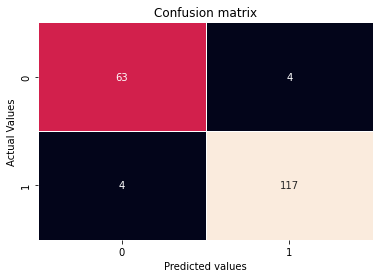

In [39]:
#Confusion matrix visualization
sns.heatmap(cm, annot=True, cbar=False, linewidths=1, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [42]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



In [45]:
#With cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neigh, scaled_x_train, y_train, cv=skf)
cv_score

array([0.8974359 , 0.94736842, 0.97368421, 0.97368421, 1.        ,
       1.        , 0.97368421, 0.94736842, 0.86842105, 0.94736842])

In [46]:
cv_score.mean()

0.9529014844804319

In [96]:
# Accuracy by fixing different k values
accuracy_rate = []
for i in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    score =  cross_val_score(neigh, scaled_x_train, y_train, cv=10)
    accuracy_rate.append(score.mean())

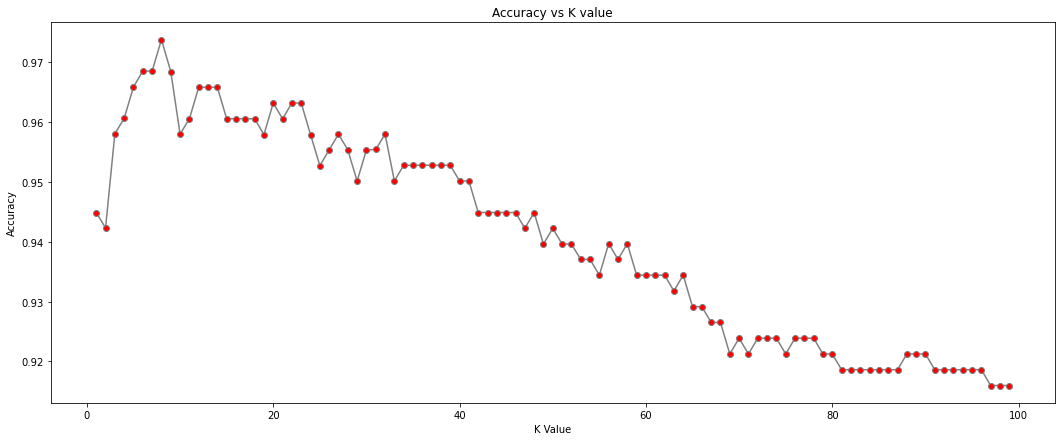

In [97]:
#Accuracy vs k value
plt.figure(figsize=(18, 7))
plt.title('Accuracy vs K value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.plot(range(1, 100), accuracy_rate, marker = 'o', markerfacecolor = 'red', color = 'grey')
plt.show()

In [98]:
# Score by fixing different k values
error_rate = []
for i in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    score =  cross_val_score(neigh, scaled_x_train, y_train, cv=10)
    error_rate.append(1-score.mean())
print(error_rate)

[0.055128205128205154, 0.05769230769230771, 0.04197031039136301, 0.03940620782726045, 0.034143049932523595, 0.03151147098515528, 0.03151147098515528, 0.02624831309041853, 0.03157894736842104, 0.04203778677462888, 0.03947368421052633, 0.03421052631578958, 0.03421052631578936, 0.03421052631578936, 0.03947368421052633, 0.03947368421052633, 0.03947368421052633, 0.03947368421052633, 0.042105263157894646, 0.03684210526315801, 0.03947368421052633, 0.03684210526315801, 0.03684210526315801, 0.04210526315789487, 0.04730094466936574, 0.0446693657219972, 0.04203778677462888, 0.0446693657219972, 0.049865047233468296, 0.0446693657219972, 0.04460188933873144, 0.04203778677462888, 0.049865047233468296, 0.047233468286099756, 0.047233468286099756, 0.047233468286099756, 0.047233468286099756, 0.047233468286099756, 0.047233468286099756, 0.049865047233468296, 0.049865047233468296, 0.055128205128205154, 0.055128205128205154, 0.055128205128205154, 0.055128205128205154, 0.055128205128205154, 0.0577597840755735

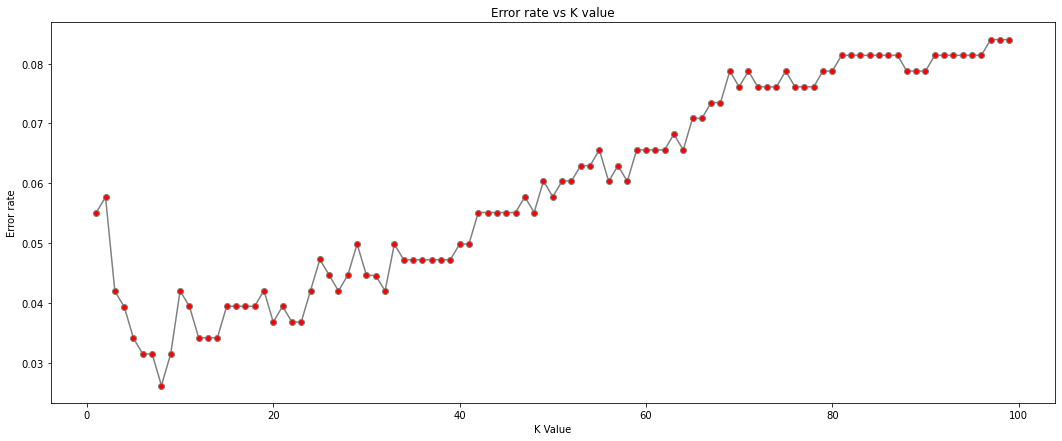

In [101]:
plt.figure(figsize=(18, 7))
plt.title('Error rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Error rate')
plt.plot(range(1, 100), error_rate, marker = 'o', markerfacecolor = 'red', color ='grey')

In [106]:
error_rate = []
for i in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(scaled_x_train, y_train)
    pred_i = neigh.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i!=y_test))
print(error_rate)

[0.05851063829787234, 0.06382978723404255, 0.0425531914893617, 0.047872340425531915, 0.0425531914893617, 0.0425531914893617, 0.0425531914893617, 0.0425531914893617, 0.031914893617021274, 0.03723404255319149, 0.0425531914893617, 0.03723404255319149, 0.0425531914893617, 0.03723404255319149, 0.047872340425531915, 0.0425531914893617, 0.05319148936170213, 0.047872340425531915, 0.047872340425531915, 0.05319148936170213, 0.05851063829787234, 0.06382978723404255, 0.047872340425531915, 0.05319148936170213, 0.05319148936170213, 0.05851063829787234, 0.047872340425531915, 0.05319148936170213, 0.047872340425531915, 0.05851063829787234, 0.05851063829787234, 0.05851063829787234, 0.05851063829787234, 0.05851063829787234, 0.05851063829787234, 0.05851063829787234, 0.05851063829787234, 0.05851063829787234, 0.05319148936170213, 0.05319148936170213, 0.05319148936170213, 0.05319148936170213, 0.05319148936170213, 0.05319148936170213, 0.05319148936170213, 0.05319148936170213, 0.05319148936170213, 0.0585106382

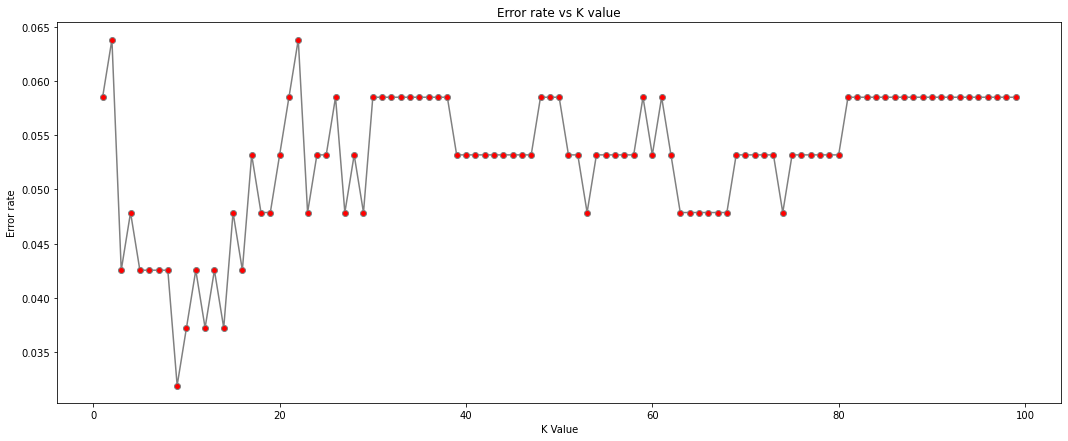

In [107]:
plt.figure(figsize=(18, 7))
plt.title('Error rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Error rate')
plt.plot(range(1, 100), error_rate, marker = 'o', markerfacecolor = 'red', color = 'grey')
plt.show()

In [108]:
#Model creation
from sklearn.neighbors import KNeighborsClassifier
final_model = KNeighborsClassifier(n_neighbors=20)
final_model.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [109]:
y_pred = final_model.predict(scaled_x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9468085106382979

In [110]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 60,   7],
       [  3, 118]], dtype=int64)

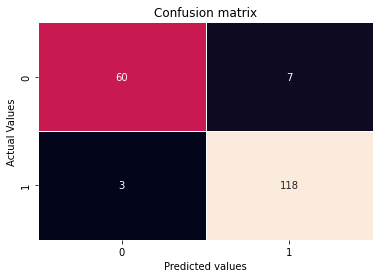

In [111]:
#Confusion matrix visualization
sns.heatmap(cm, annot=True, cbar=False, linewidths=1, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [112]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.94      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188

